In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer   # 결측치값 대체.
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
na_values_df = pd.read_csv("../data/final_dataset.csv")
na_values_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32545 entries, 0 to 32544
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32545 non-null  object 
 1   code_presentation     32545 non-null  object 
 2   id_student            32545 non-null  int64  
 3   gender                32545 non-null  object 
 4   region                32545 non-null  object 
 5   highest_education     32545 non-null  int64  
 6   imd_band              32545 non-null  float64
 7   age_band              32545 non-null  int64  
 8   num_of_prev_attempts  32545 non-null  int64  
 9   studied_credits       32545 non-null  int64  
 10  disability            32545 non-null  object 
 11  date_registration     32545 non-null  float64
 12  date_unregistration   32545 non-null  float64
 13  sum_click             32545 non-null  float64
 14  avg_score             32545 non-null  float64
 15  is_dropout         

In [3]:
na_values_df.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date_registration,date_unregistration,sum_click,avg_score,is_dropout,target
0,AAA,2013J,11391,M,East Anglian Region,3,10.0,60,0,240,N,-159.0,9999.0,934.0,82.0,0,0
1,AAA,2013J,28400,F,Scotland,3,3.0,45,0,60,N,-53.0,9999.0,1435.0,66.4,0,0
2,AAA,2013J,30268,F,North Western Region,2,4.0,45,0,60,Y,-92.0,12.0,281.0,0.0,1,1
3,AAA,2013J,31604,F,South East Region,2,6.0,45,0,60,N,-52.0,9999.0,2158.0,76.0,0,0
4,AAA,2013J,32885,F,West Midlands Region,1,6.0,30,0,60,N,-176.0,9999.0,1034.0,54.4,0,0


In [4]:

X = na_values_df.drop(columns='target').values
# X = X.astype('float32')
y = na_values_df['target'].values
y = y.astype(int)

X.shape,  y.shape

((32545, 16), (32545,))

In [5]:
fe_transformer = ColumnTransformer([
    ("category_ohe", OneHotEncoder(), [0, 1, 3, 4, 5, 6, 7, 8, 10,15]),# feature의 index로 지정.   # index는 앞에 했던 배열로 적용해줘야함.
    ("number_scaler", StandardScaler(), [9,11,12,13,14])    #feature Scaling은 연속형끼리 같은 방식을 사용 (standard or MinMax 중 택1)
])
### DataFrame이 입력일 경우 컬럼명이나 컬럼 index를 지정할 수 있다.
### ndarray가 입력일 경우 컬럼(feature) index를 지정.
new_merged_df = fe_transformer.fit_transform(X)
print(new_merged_df)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 488169 stored elements and shape (32545, 60)>
  Coords	Values
  (0, 0)	1.0
  (0, 8)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 29)	1.0
  (0, 40)	1.0
  (0, 43)	1.0
  (0, 44)	1.0
  (0, 51)	1.0
  (0, 53)	1.0
  (0, 55)	3.905125197007625
  (0, 56)	-1.8185928989610989
  (0, 57)	0.6671221427396934
  (0, 58)	-0.1670317117402033
  (0, 59)	0.7100890620793591
  (1, 0)	1.0
  (1, 8)	1.0
  (1, 11)	1.0
  (1, 19)	1.0
  (1, 29)	1.0
  (1, 33)	1.0
  (1, 42)	1.0
  (1, 44)	1.0
  (1, 51)	1.0
  (1, 53)	1.0
  :	:
  (32543, 40)	1.0
  (32543, 42)	1.0
  (32543, 44)	1.0
  (32543, 51)	1.0
  (32543, 54)	1.0
  (32543, 55)	-1.211159957215567
  (32543, 56)	0.4144516877944941
  (32543, 57)	-1.487791864498921
  (32543, 58)	-0.5562260670917427
  (32543, 59)	1.0137563256706723
  (32544, 6)	1.0
  (32544, 10)	1.0
  (32544, 11)	1.0
  (32544, 25)	1.0
  (32544, 29)	1.0
  (32544, 36)	1.0
  (32544, 42)	1.0
  (32544, 44)	1.0
  (32544, 51)	1.0
  (32544, 53)	1.0
  (32544, 55)

In [6]:
X = new_merged_df
X = X.astype('float32')
X = X.toarray()
# y = new_merged_df['target'].values
y = y.astype(int)
X.shape,  y.shape

((32545, 60), (32545,))


 >>> Tuning Decision Tree...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
- Complete:4.59325초

 >>> Tuning Random Forest...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:2.64032초

 >>> Tuning KNN...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:6.93645초

 >>> Tuning SVM...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:23.29396초

 >>> Tuning XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:4.71000초

 >>> Tuning Logistic Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:4.54953초

 >>> Tuning SGDClassifier...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:0.77907초

 >>> Tuning AdaBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:7.24347초

 >>> Tuning CatBoost...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
- Complete:39.73229초

 >>> Tuning Naive Bayes...
Fitting 5 

c:\Users\kimzi\miniconda3\envs\pj2\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[✔] 전체 모델과 지표가 저장되었습니다: ../model/all_models.pkl

=== Final Comparison ===
              Model                                                                      Best Params  Train Accuracy (CV)  Test Accuracy
           CatBoost         {'depth': 5, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.03}             0.900983       0.899370
            XGBoost                    {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}             0.899485       0.898448
           LightGBM                    {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 50}             0.898525       0.896451
      Random Forest                    {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}             0.884660       0.887079
                SVM                                     {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}             0.882932       0.886311
Logistic Regression                                    {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}    

KeyError: 'Accuracy'

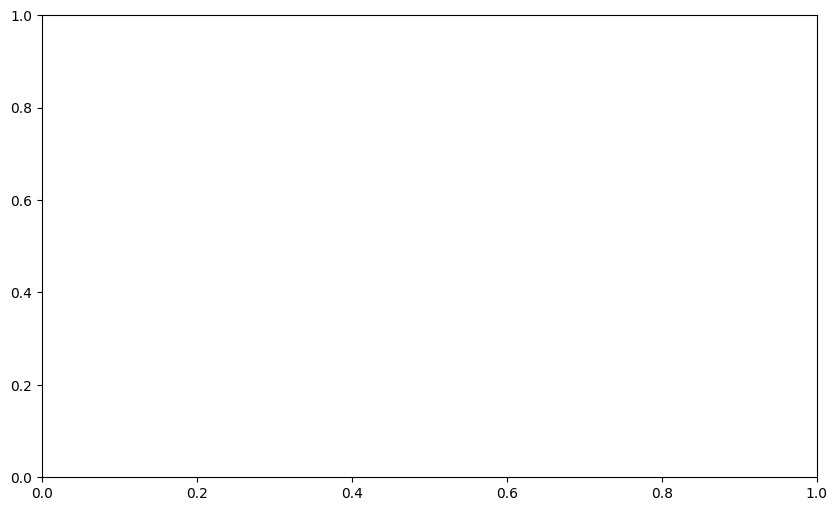

In [7]:
import sys
from pathlib import Path
# 상위 폴더를 Python 경로에 추가
sys.path.append(str(Path.cwd().parent))
from util.model_tuning import auto_model_tuning
from util.model_io import save_model, load_model, save_models, load_models
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier


X = new_merged_df
X = X.astype('float32')
X = X.toarray()

y = y.astype(int)


base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "SGDClassifier": SGDClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Naive Bayes": GaussianNB(),
    "LightGBM": LGBMClassifier(random_state=42)
    # "MLPClassifier": MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)
}

param_grids = {
    "Decision Tree": {
        "max_depth":range(1, 5),
        "max_leaf_nodes": [3, 5, 10],
        "min_samples_leaf": [2, 5, 10],
        "max_features": [1, 5, 10]},
    "Random Forest": {
        'n_estimators': [50, 100], #200, 300],
        'max_depth':[10],#, 20, 30],
        "min_samples_leaf": [2]#, 5, 10],
        },
    "KNN": {
        'n_neighbors':[3,5],
        'weights': ['uniform', 'distance']},
    "SVM": {
        'C': [0.1], #[0.001,   #, 0.1, 1, 10],
        'gamma': [0.1], #[0.01, 0.1, 1, 10],
        'kernel': ['linear']},
    "XGBoost": {
        'n_estimators': [1000],
        'learning_rate' : [0.01],
        'max_depth': [5]},
    "Logistic Regression": {
        'C': [0.1],  # 규제 강도
        'penalty': [ 'l2'],  # 규제 유형
        'solver': ['saga']},
    "SGDClassifier": {
        'loss': ['log_loss', 'hinge'],  # log_loss=로지스틱, hinge=SVM
        'alpha': [ 0.01],  # 규제 계수
        'learning_rate': ['adaptive'],
        'eta0': [0.1]},
    "AdaBoost": {
        'n_estimators': [50, 100],
        'learning_rate': [0.5, 1.0]
    },
    "CatBoost": {
        'iterations': [500], #(500, 5001, 500),
        'depth': [4, 5], #range(4,11),
        'learning_rate': [0.03], # [0.01, 0.03, 0.05, 0.1, 0.3],
        'l2_leaf_reg' : [1,3,5] #range(1, 11)
    },
    "Naive Bayes": {
        # GaussianNB has no hyperparameters commonly tuned, but for structure:
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    "LightGBM": {
        'n_estimators': [100],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50]
    }
    # "MLPClassifier": {
    #     'hidden_layer_sizes': [(50,), (100,), (50, 30)],
    #     'activation': ['relu', 'tanh'],
    #     'alpha': [0.0001, 0.001],  # L2 규제 강도
    #     'learning_rate_init': [0.001, 0.01],
    #     'batch_size': [32, 64]
    # }
}

# 함수 실행
results_df, best_models = auto_model_tuning(base_models, param_grids, X, y)

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. 모델 및 전처리 로드
with open("../model/all_models.pkl", "rb") as f:
    model_bundle = pickle.load(f)

# 가장 성능이 높은 모델 선택
best_model_name = max(model_bundle, key=lambda name: model_bundle[name]["metrics"]["test_accuracy"])
best_model = model_bundle[best_model_name]["model"]
print(f"Best Model: {best_model_name}")

# 2. 전처리기 다시 정의 (학습 때 사용한 구조와 동일하게)
fe_transformer = ColumnTransformer([
    ("category_ohe", OneHotEncoder(handle_unknown='ignore'), [0, 1, 3, 4, 5, 6, 7, 8, 10, 15]),
    ("number_scaler", StandardScaler(), [9,11,12,13,14])
])

# 3. 기존 데이터 불러오기 (유사도 비교용)
base_df = pd.read_csv("../data/final_dataset.csv")
X_base = base_df.drop(columns="target")

# 4. 새로운 입력 데이터 예시 (범주형만 입력)
new_input = pd.DataFrame([{
    0: "A", 1: "B", 3: "C", 4: "D", 5: "E", 6: "F", 7: "G", 8: "H", 10: "I", 15: "J"
}], dtype=object)

# 5. 기존 데이터와 범주형만 동일한 기준으로 변환
cat_columns = [0, 1, 3, 4, 5, 6, 7, 8, 10, 15]
num_columns = [9, 11, 12, 13, 14]

X_base_cat = X_base[cat_columns]
new_cat_input = new_input[cat_columns]

# 원핫 인코딩만 따로 적용해서 비교용 데이터 생성
cat_encoder = OneHotEncoder(handle_unknown='ignore')
X_base_cat_encoded = cat_encoder.fit_transform(X_base_cat).toarray()
new_cat_encoded = cat_encoder.transform(new_cat_input).toarray()

# 6. 유사한 기존 데이터 1개 선택
similarities = cosine_similarity(new_cat_encoded, X_base_cat_encoded)
most_similar_index = np.argmax(similarities)

# 7. 해당 인덱스의 수치형 컬럼을 사용해 입력 데이터 보완
new_complete_input = new_input.copy()
for col in num_columns:
    new_complete_input[col] = X_base.iloc[most_similar_index, col]

# 수치형까지 포함된 최종 입력 데이터를 원래 순서로 정렬
new_complete_input = new_complete_input.reindex(columns=X_base.columns)

# 8. 전처리 후 예측
fe_transformer.fit(X_base.values)  # 원본 데이터로 전처기 학습
X_transformed = fe_transformer.transform(new_complete_input.values).toarray()

# 예측
prediction = best_model.predict(X_transformed)
print("✅ 예측 결과:", prediction)
